# Exercises (Optional)

These exercises are not required to complete however are good to do for practice. (Not to be submitted on git)

These exercises are a mix of Python and pandas/EDA practice. Most should be no more than a few lines of code! 

In [2]:
# here is a Python list:

a = [1, 2, 3, 4, 5, 6]

# get a list containing the last 3 elements of a

# reverse the list

# get a list where each entry in a is squared (so the new list is [1, 4, 9, 16, 25, 36])


In [7]:
asub = a[-3:]
asub.reverse()
asquared = [i**2 for i in a]

In [10]:
import numpy as np

In [11]:
# create a numpy array from this list
b = np.array(a)

In [12]:
# find the mean of b
m = np.mean(b)

In [13]:
# get a list where each entry in b is squared (so the new numpy array is [1, 4, 9, 16, 25, 36])
# use a different (numpy-specific) approach
bsquare = b**2

In [14]:
bsquare

array([ 1,  4,  9, 16, 25, 36])

In [15]:
# change b from a length-6 list to a 2x3 matrix
b = b.reshape((2, 3))

In [16]:
b

array([[1, 2, 3],
       [4, 5, 6]])

In [18]:
# find the mean value of each row
b[0].mean()
b[1].mean()

5.0

In [20]:
# find the mean value of each column
for c in range(len(b[0])):
    print(np.mean(b[:, c]))

2.5
3.5
4.5


In [21]:
# find the third column of b
col = b[:, 2]

In [23]:
import pandas as pd

In [24]:
# load in the "starbucks.csv" dataset
data = pd.read_csv('../data/starbucks.csv')

In [25]:
data.head()

,beverage_category,beverage,beverage_prep,calories,total fat,trans fat,saturated fat,sodium,total carbohydrates,cholesterol,dietary fibre,sugars,protein,vitamin a,vitamin c,calcium,iron,caffeine
0,coffee,brewed coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,0.0,175.0
1,coffee,brewed coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0.0,260.0
2,coffee,brewed coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0.0,330.0
3,coffee,brewed coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0.0,410.0
4,classic espresso drinks,caff latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10,0,20,0.0,75.0


In [26]:
# this is nutritional info for starbucks items
# let's see if we can answer some questions

# what is the average # calories across all items?
data['calories'].mean()

193.87190082644628

In [29]:
# how many different categories of beverages are there?
len(data['beverage_category'].unique())

9

In [36]:
# what is the average # calories for each beverage category?
for index, group in data.groupby('beverage_category'):
    print(index)
    #print(group)
    print(group['calories'].mean())

classic espresso drinks
140.17241379310346
coffee
4.25
frappuccino blended coffee
276.94444444444446
frappuccino blended crme
233.07692307692307
frappuccino light blended coffee
162.5
shaken iced beverages
114.44444444444444
signature espresso drinks
250.0
smoothies
282.22222222222223
tazo tea drinks
177.30769230769232


In [99]:
# what beverage preparation includes the most sugar on average?
data.groupby('beverage_prep').agg({'sugars': 'mean'}).idxmax()

sugars    Whole Milk
dtype: object

In [50]:
# what is the average % daily value calcium content for each beverage?
data.groupby('beverage').agg({'calcium': 'mean'})

,calcium
beverage,
banana chocolate smoothie,20.000000
brewed coffee,0.500000
caff americano,1.500000
caff latte,35.000000
caff mocha (without whipped cream),30.000000
cappuccino,22.500000
caramel,11.000000
caramel (without whipped cream),12.000000
caramel apple spice (without whipped cream),0.000000


In [63]:
# It's bulking season. What drink should Naitian get so that he maximizes protein but minimizes calories?
# (you can use more than one line for this one)
# there are multiple valid approaches you can take for this (with different answers)
# I know that you want more calories for bulking season but whatever this is MDST, not Michigan Muscle Club okay
data.sort_values(by='protein', ascending=False).head()

,beverage_category,beverage,beverage_prep,calories,total fat,trans fat,saturated fat,sodium,total carbohydrates,cholesterol,dietary fibre,sugars,protein,vitamin a,vitamin c,calcium,iron,caffeine,protein/calorie ratio
172,smoothies,banana chocolate smoothie,Grande Nonfat Milk,280,2.5,1.5,0.0,5,150,53,7,34,20.0,10,15,20,0.0,89.520548,0.071429
173,smoothies,banana chocolate smoothie,2% Milk,300,5.0,2.5,0.1,15,160,53,7,34,20.0,8,15,20,20.0,15.000000,0.066667
174,smoothies,banana chocolate smoothie,Soymilk,290,4.5,1.5,0.0,5,150,51,7,31,19.0,6,15,20,20.0,15.000000,0.065517
83,signature espresso drinks,white chocolate mocha (without whipped cream),Venti Nonfat Milk,450,7.0,6.0,0.0,10,310,78,0,74,19.0,25,2,60,2.0,150.000000,0.042222
84,signature espresso drinks,white chocolate mocha (without whipped cream),2% Milk,510,15.0,9.0,0.2,35,330,77,0,74,19.0,20,4,60,2.0,150.000000,0.037255


In [60]:
data['protein/calorie ratio'] = data['protein']/data['calories']

In [64]:
data[data['protein']>18].sort_values(by='protein/calorie ratio', ascending=False).head()

,beverage_category,beverage,beverage_prep,calories,total fat,trans fat,saturated fat,sodium,total carbohydrates,cholesterol,dietary fibre,sugars,protein,vitamin a,vitamin c,calcium,iron,caffeine,protein/calorie ratio
172,smoothies,banana chocolate smoothie,Grande Nonfat Milk,280,2.5,1.5,0.0,5,150,53,7,34,20.0,10,15,20,0.0,89.520548,0.071429
173,smoothies,banana chocolate smoothie,2% Milk,300,5.0,2.5,0.1,15,160,53,7,34,20.0,8,15,20,20.0,15.000000,0.066667
174,smoothies,banana chocolate smoothie,Soymilk,290,4.5,1.5,0.0,5,150,51,7,31,19.0,6,15,20,20.0,15.000000,0.065517
83,signature espresso drinks,white chocolate mocha (without whipped cream),Venti Nonfat Milk,450,7.0,6.0,0.0,10,310,78,0,74,19.0,25,2,60,2.0,150.000000,0.042222
84,signature espresso drinks,white chocolate mocha (without whipped cream),2% Milk,510,15.0,9.0,0.2,35,330,77,0,74,19.0,20,4,60,2.0,150.000000,0.037255


In [65]:
# plot the distribution of the number of calories in drinks using matplotlib
from matplotlib import pyplot as plt

(array([16., 32., 45., 49., 33., 30., 22.,  8.,  4.,  3.]),
 array([  0.,  51., 102., 153., 204., 255., 306., 357., 408., 459., 510.]),
 <BarContainer object of 10 artists>)

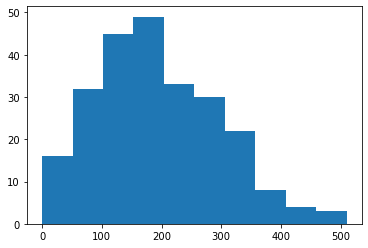

In [66]:
fig, ax = plt.subplots()
ax.hist(data['calories'])

In [67]:
# plot the same distribution using seaborn. what about a density plot instead?
import seaborn as sns

<AxesSubplot:xlabel='calories', ylabel='Count'>

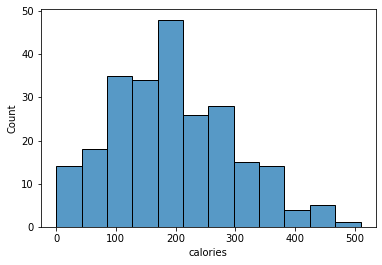

In [69]:
sns.histplot(data=data, x='calories')

<AxesSubplot:xlabel='calories', ylabel='Count'>

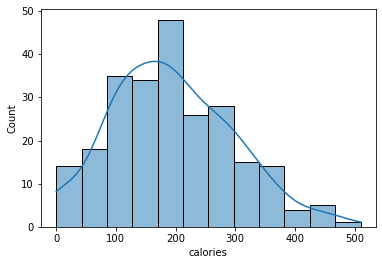

In [73]:
sns.histplot(data=data, x='calories', kde=True)

<AxesSubplot:xlabel='calories', ylabel='Density'>

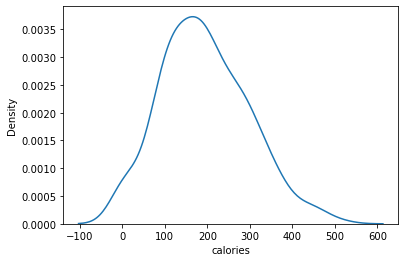

In [70]:
sns.kdeplot(data=data, x='calories')

<AxesSubplot:xlabel='total fat', ylabel='calories'>

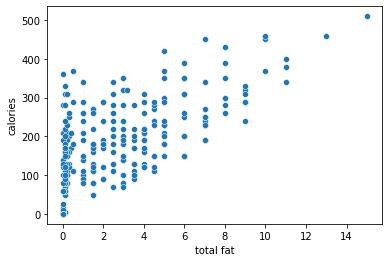

In [72]:
# plot calories against total fat using seaborn
sns.scatterplot(data=data, x='total fat', y='calories')

In [79]:
# plot the distribution of calories in Short, Tall, Grande, and Venti drinks
# (you can use multiple lines for this)
# twist: you should also include the Nonfat Milk drinks that also have an associated size.

# you can decide how you want to visualize this. Colors? Small multiples? Density vs histogram?
# the starbucks is your oyster.

In [80]:
data['beverage_prep'].unique()

array(['Short', 'Tall', 'Grande', 'Venti', 'Short Nonfat Milk', '2% Milk',
       'Soymilk', 'Tall Nonfat Milk', 'Grande Nonfat Milk',
       'Venti Nonfat Milk', 'Solo', 'Doppio', 'Whole Milk'], dtype=object)

In [82]:
short = data[data['beverage_prep'].str.contains("Short")]
tall = data[data['beverage_prep'].str.contains("Tall")]
grande = data[data['beverage_prep'].str.contains("Grande")]
venti = data[data['beverage_prep'].str.contains("Venti")]

In [94]:
cats = [short, tall, grande, venti]
labels = ['short', 'tall', 'grande', 'venti']

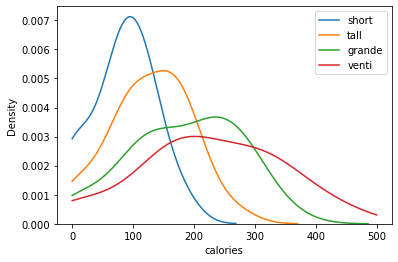

In [96]:
fig, ax = plt.subplots()
for i, c in enumerate(cats):
    sns.kdeplot(data=c, x='calories', ax=ax, clip=[0, 500], label=labels[i])
ax.legend()